# **Filtros de Respuesta al Impulso Finita (*finite impulse responce - FIR*)**
Un filtro de respuesta al impulso finita (FIR) es un sistema de procesamiento digital de señales caracterizado por tener su respuesta al impulso acotada en el dominio del tiempo. Esto significa que su salida es una suma ponderada de muestras pasadas y presentes de la señal de entrada.
Las propiedades más interesantes de los filtros FIR son su respuesta en fase lineal y su estabilidad. Son ampliamente utilizados en el procesamiento de señales de audio, imagen y telecomunicaciones.

Los coeficientes de los filtros FIR son calculados en base a las especificaciones de diseño dadas por cuatro parámetros:
- Riple en la banda de paso (δp)
- Frecuencia límite de la banda de paso (fp).
- Frecuencia límite de la banda de atenuación (fs).
- Atenuación (δs)

Los métodos utilizados para el cálculo de los coeficientes son:
- Método de la ventana
- Método del muestreo en frecuencia
- Método óptimo


# Los pasos para el diseño de filtros FIR son los siguientes:

**Determinar las especificaciones del filtro:** Esto involucra especificaciones del tipo de filtro (pasa bajos, pasa altos, pasa banda o elimina banda), la frecuencia de corte, la banda de transición (el rango de frecuencias entre la banda de paso y la banda de atenuación), riple en la banda de paso y atenuación.

**Elegir un método de diseño:** La selección depende de las especificaciones del filtro y de las propiedades deseadas.

**Calcular los coeficientes del filtro:** Según la fórmula o algoritmo que corresponda con el método seleccionado. Los coeficientes determinan la forma de la respuesta en frecuencia.

**Evaluar el desempeño del filtro:** A pesar de haber seguido los pasos anteriores, se debe verificar si se cumplen o no las espeficicaciones. Esto involucra el análisis de la respuesta en frecuencia del filtro, la respuesta en fase, la respuesta al impulso, entre otras métricas.

**Implementar el filtro:** Una vez que el diseño está completo, este puede ser implementado en software o hardware en tiempo real.

# Método de la Ventana
El método de la ventana es uno de los más comunes para el diseño de filtros FIR. La idea básica del método es truncar la respuesta al impulso de un filtro ideal multiplicándola por una función llamada ventana, lo cual ayuda a conformar la respuesta en frecuencia del filtro. Los pasos para el diseño del filtro FIR utilizando el método de la ventana son:

i. Determinar las especificaciones del filtro, principalmente el tipo de filtro, la frecuencia de corte, la banda de transición, el riple y la atenuación.

ii. Seleccionar la función ventana, esto es Hamming, Hann, Blackman, o Kaiser. Que depende del riple en la banda de paso y la atenuación requeridos.

iii. Seleccionar la cantidad de coeficientes según el ancho de la banda de transición.

iv. Calcular la respuesta al impulso ideal del filtro correspondiente, que es de duración infinita y por lo tanto se trunca para volverla realizable.

v. Multiplicar la respuesta al impulso del filtro ideal por la función de ventana para obtener los coeficientes del filtro realizable.

vi. Normalizar los coeficientes del filtro para asegurar que el filtro tiene ganancia unitaria en la frecuencia cero (constante).

vii. Evaluar el comportamiento del filtro analizando su respuesta en frecuencia, respuesta en fase, u otra métrica según el caso. Si el filtro no cumple con las especificaciones deseadas, aumentar el número de coeficientes o modificar la ventana.

viii. Implementar el filtro en software o hardware para procesar señales en tiempo real.

# Función Ventana
Cada función de ventana utilizada en el diseño de filtros FIR tiene sus propias ventajas y desventajas, como se describe a continuación:

**Ventana Rectangular:** La ventana rectangular es la más simple y posee una forma plana en el dominio del tiempo. Es fácil de calcular y provee buena banda de transición, pero posee relativamente bajos niveles de atenuación y altos riples.

**Ventana Hamming:** Provee una solución de compromiso entre el ancho de banda de transición y la atenuación. Es apropiada para muchas aplicaciones.

**Hann window:** Similar a la ventana de Hamming, pero provee mejor atenuación a expensas de mayor ancho de banda de transición.

**Blackman window:** . Provee aun mayor atenuación a expensas de mayor ancho de banda de transición.

**Kaiser window:** Es una ventana variable que provee mayor control en los niveles de riple y atenuación y ancho de banda de transición. Permite el diseño de filtros con la mayor atenuación.

# **Ejemplo de filtro pasa bajos utilizando la ventana de Hamming**

En este código, se define la frecuencia de muestreo fs, frecuencia de corte deseada, ancho de la banda de transición, y el número de coeficientes del filtro. Luego, se utiliza la función firwin para calcular los coeficientes del filtro que son almacenados en la variable taps. Finalmente, se utiliza la función freqz para determinar la respuesta en frecuencia del filtro, que es graficada con el comando matplotlib.

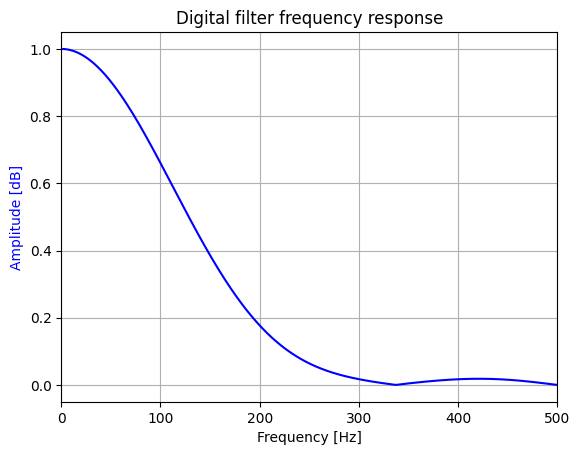

In [1]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = 50 # Desired cutoff frequency, Hz
trans_width = 10 # Width of transition from pass band to stop band, Hz
numtaps = 8 # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


In [2]:
taps

array([0.01740632, 0.06120739, 0.16616441, 0.25522188, 0.25522188,
       0.16616441, 0.06120739, 0.01740632])

In [4]:
for val in taps:
    print(f"{val},")

0.017406324694453395,
0.06120738745326019,
0.16616440570451896,
0.2552218821477675,
0.2552218821477675,
0.16616440570451896,
0.06120738745326019,
0.017406324694453395,


`from scipy.signal import firwin, freqz`

`scipy.signal` library is used to perform signal processing operations including digital filter design. The `firwin` function is used to design FIR filters and the `freqz` function is used to compute the frequency response of a digital filter. These functions are commonly used in Python for filter design and analysis.


```
# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = 100 # Desired cutoff frequency, Hz
trans_width = 100 # Width of transition from pass band to stop band, Hz
numtaps = 101 # Size of the FIR filter
```
These are the filter requirements, which define the specifications for the FIR filter to be designed:

**fs** is the sampling rate of the input signal, in Hz.

**cutoff** is the desired cutoff frequency of the filter, in Hz. Frequencies below the cutoff frequency will be passed, while frequencies above will be attenuated.

**trans_width** is the width of the transition band between the pass band and stop band of the filter, in Hz. This is the frequency range over which the filter transitions from passing to attenuating the signal.

**numtaps** is the number of filter coefficients or taps, which determines the order and complexity of the filter.



```
# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=True, fs=fs)
```
This line of code uses the firwin function from the scipy.signal library to design the FIR filter coefficients. The function takes the following arguments:

**numtaps:** the number of filter coefficients to compute
cutoff: the cutoff frequency of the filter

**window:** the window function to apply to the filter coefficients. A window function helps to smooth out the transition band of the filter.

**pass_zero:** whether to create a low-pass or high-pass filter. If True, a low-pass filter is created that passes frequencies below cutoff. If False, a high-pass filter is created that passes frequencies above cutoff.

**fs:** the sampling rate of the input signal, in Hz.

In this case, a low-pass filter is designed using a Hamming window function. The resulting filter coefficients are stored in the taps variable.


```
# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)
```
This line of code uses the freqz function from the scipy.signal library to compute the frequency response of the filter. The function takes the following arguments:

**b:** the numerator coefficients of the filter (in this case, the FIR filter coefficients)

**a:** the denominator coefficients of the filter (in this case, a value of 1 since we are using an FIR filter)

**worN:** the number of frequency points to compute the frequency response at (in this case, 2000 points)

The function returns the frequency values w (in radians/sample) and the complex frequency response h of the filter at those frequencies. The freqz function is commonly used to visualize the frequency response of a digital filter.



```
# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()
```
This code block uses matplotlib library to plot the frequency response of the designed FIR filter.

`fig, ax1 = plt.subplots()` creates a figure and an axis object for the plot.

`ax1.set_title('Digital filter frequency response')` sets the title of the plot.

`ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')` plots the frequency response of the filter using the frequency values w and the complex frequency response h computed by the freqz function. `np.abs(h)` is used to plot the magnitude response of the filter. The frequency values are converted to Hz using the formula `0.5*fs*w/np.pi`. `'b'` specifies that the plot should be shown in blue.

`ax1.set_ylabel('Amplitude [dB]', color='b')` sets the label for the y-axis of the plot.

`ax1.set_xlabel('Frequency [Hz]')` sets the label for the x-axis of the plot.

`ax1.set_ylim([-0.05, 1.05])` sets the y-axis limits of the plot to be between -0.05 and 1.05.

`ax1.set_xlim([0, 0.5*fs])` sets the x-axis limits of the plot to be between 0 and half of the sampling rate fs/2.\

`ax1.grid()` adds a grid to the plot.

`plt.show()` displays the plot.

# Filtro pasa bajos utilizando la ventana de Blackman

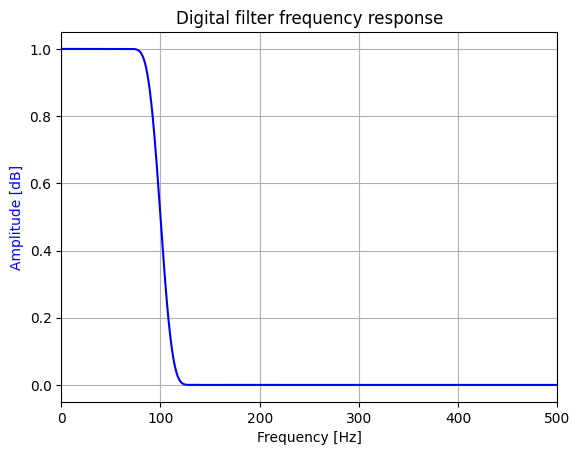

In [3]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = 100 # Desired cutoff frequency, Hz
trans_width = 100 # Width of transition from pass band to stop band, Hz
numtaps = 101 # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='blackman', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Low Pass Filter using Rectangular window method

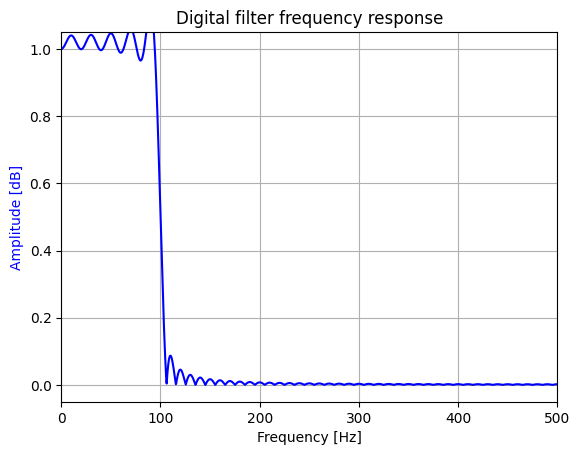

In [4]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = 100 # Desired cutoff frequency, Hz
trans_width = 100 # Width of transition from pass band to stop band, Hz
numtaps = 101 # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='rectangular', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Low Pass Filter using Hanning window method

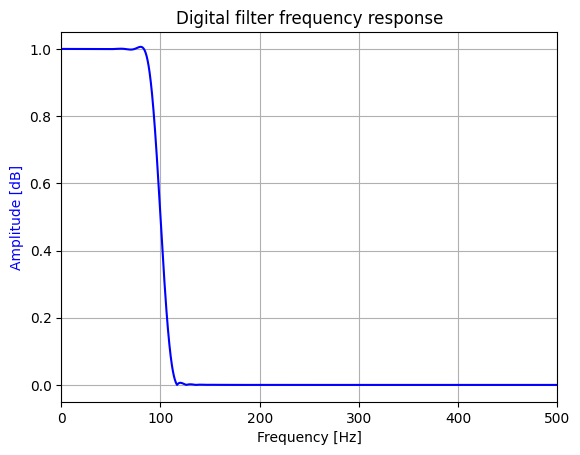

In [5]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = 100 # Desired cutoff frequency, Hz
trans_width = 100 # Width of transition from pass band to stop band, Hz
numtaps = 101 # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hann', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# **High Pass Filter**

# High Pass Filter using Hanning window method

In this code, we specify the filter requirements such as the sample rate, cutoff frequency, transition width, and number of taps. Then, we use the firwin function to compute the filter coefficients using the Hann window function and the `pass_zero=False` parameter to create a high-pass filter. Finally, we compute the frequency response of the filter using the freqz function and plot it using matplotlib.

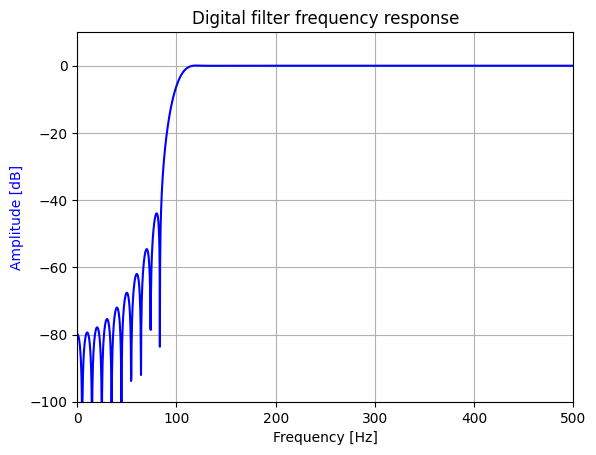

In [6]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
cutoff = 100  # Desired cutoff frequency, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hann', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# High Pass Filter using Hamming window method

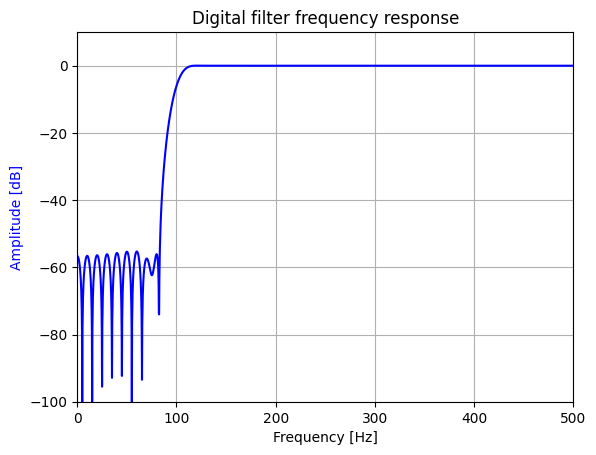

In [7]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
cutoff = 100  # Desired cutoff frequency, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# High Pass Filter using Blackman window method

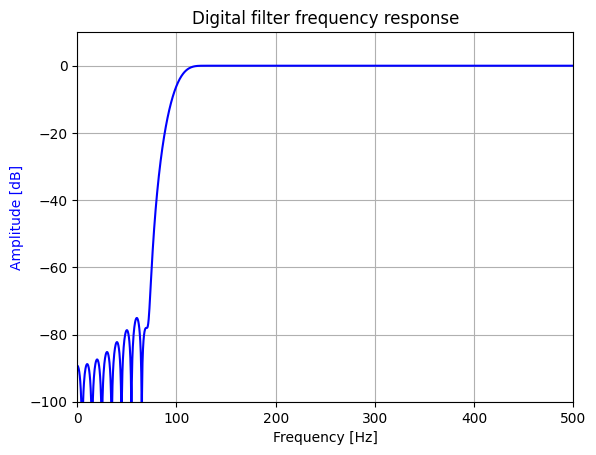

In [8]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
cutoff = 100  # Desired cutoff frequency, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='blackman', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# High Pass Filter using Rectangular window method

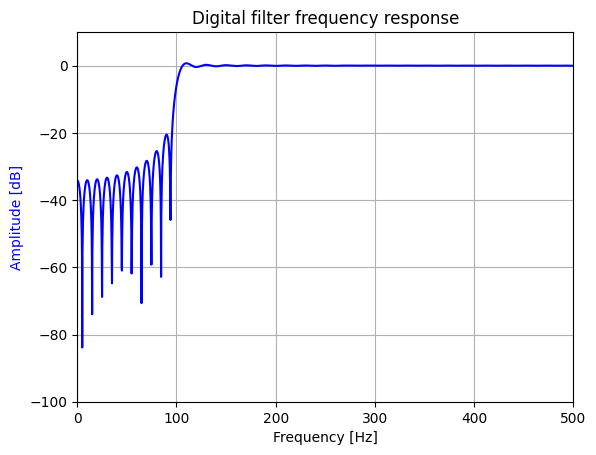

In [9]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
cutoff = 100  # Desired cutoff frequency, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='rectangular', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# **Band-pass Filter**

# Band-pass ass Filter using blackman window method

In this code, we specify the filter requirements such as the sample rate, band-pass range, transition width, and number of taps. Then, we use the firwin function to compute the filter coefficients using the Blackman window function and the `pass_zero=False` parameter to create a band-pass filter. Finally, we compute the frequency response of the filter using the freqz function and plot it using matplotlib.

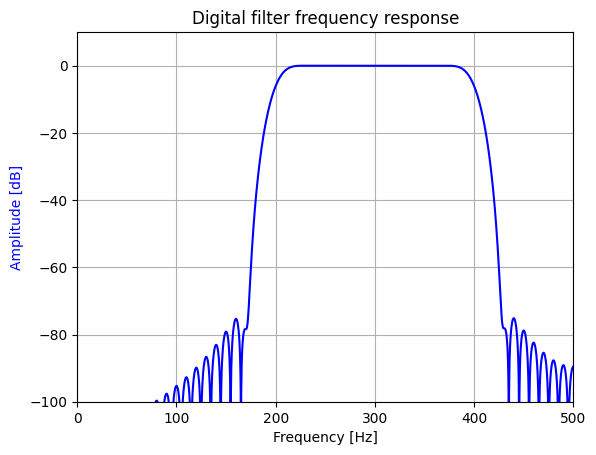

In [10]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-pass range, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='blackman', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Band-pass ass Filter using Hanning window method

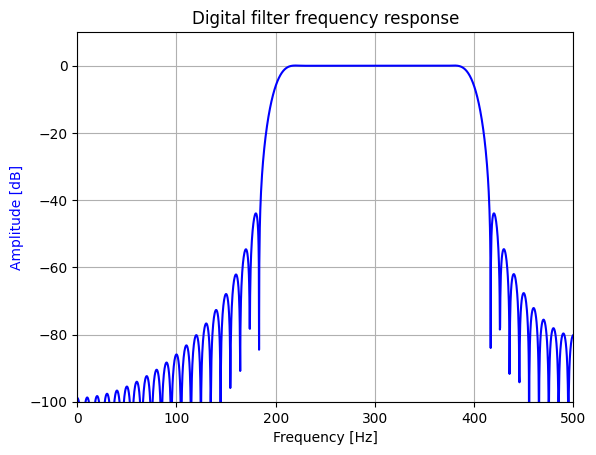

In [11]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-pass range, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hann', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Band-pass ass Filter using Hamming window method

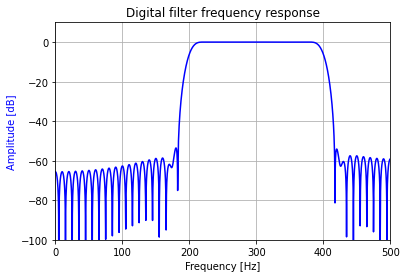

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-pass range, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Band-pass ass Filter using rectangular window method

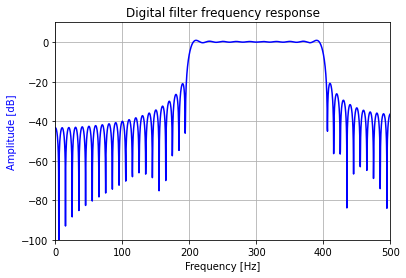

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-pass range, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='rectangular', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# **Band-stop Filter**

# Band-stop ass Filter using Hamming window method

In this code, we specify the filter requirements such as the sample rate, band-stop range, transition width, and number of taps. Then, we use the firwin function to compute the filter coefficients using the Hamming window function and the `pass_zero=True` parameter to create a band-stop filter. Finally, we compute the frequency response of the filter using the freqz function and plot it using matplotlib.

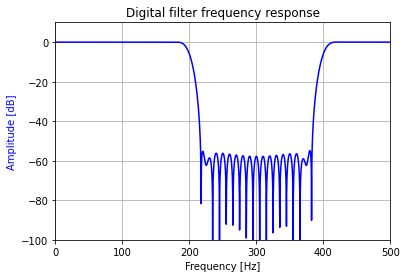

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-stop range, Hz
trans_width = 100  # Width of transition from stop band to pass band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hamming', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Band-stop ass Filter using Hanning window method

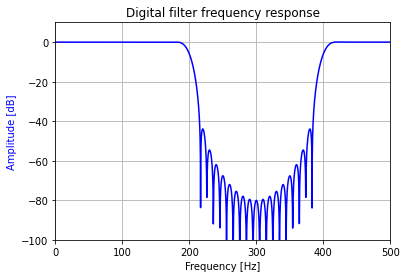

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-stop range, Hz
trans_width = 100  # Width of transition from stop band to pass band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hann', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Band-stop ass Filter using Rectangular window method

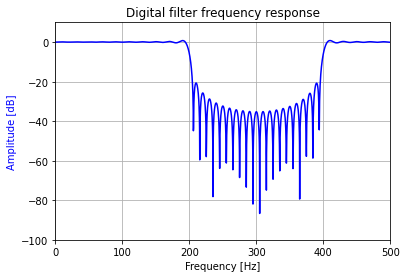

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-stop range, Hz
trans_width = 100  # Width of transition from stop band to pass band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='rectangular', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


# Band-stop ass Filter using Blackman window method

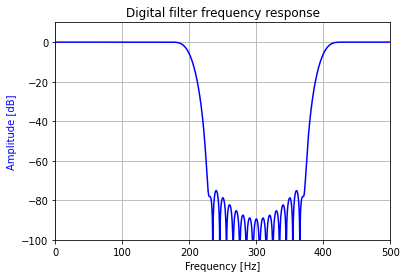

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-stop range, Hz
trans_width = 100  # Width of transition from stop band to pass band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='blackman', pass_zero=True, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()
